
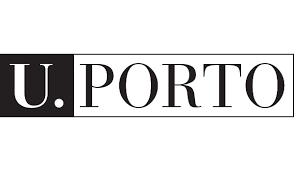

# **Trabalho final da Unidade Curricular - Visão Computacional**

**Aluna:** *Lirielly Ruela Vitorugo Nascimento*

**Objetivo:** Detectar *placas de sinalização ferroviária* em uma das ferrovias do Brasil adiministrada por uma empresa privada.

## **1) Mount drive, link my folder and navigate to /mydrive/yolov4 folder**

In [1]:
# Mount my drive
%cd ..
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

# The following command will create a symbolic link
!ln -s /content/gdrive/My\ Drive/ /mydrive

# Navegate to /mydrive/yolov4 folder
%cd /mydrive/yolov4

/
Mounted at /content/gdrive
/content/gdrive/My Drive/yolov4


## **2) Clone `darknet` git repository** 

In [ ]:
# Cloning Darknet git repository
#!git clone https://github.com/AlexeyAB/darknet

## **3) Make changes in the `makefile` to enable OPENCV and GPU**

In [2]:
# Making changes in the makefile to enable OPENCV and GPU
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/My Drive/yolov4/darknet


## **4) Run `make` command to build darknet**

In [3]:
# Running make command to build darknet
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## **5) Copy all the files from the *`yolov4`* folder to the darknet directory**

In [ ]:
#!unzip /mydrive/yolov4/obj.zip -d data/

In [ ]:
#!cp /mydrive/yolov4/yolov4-custom.cfg cfg

In [ ]:
#!cp /mydrive/yolov4/obj.names data
#!cp /mydrive/yolov4/obj.data  data

## **6) Download the pre-trained *`yolov4`* weights**

In [ ]:
# Downloading the pre-trained YOLOv4 weights
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

## **7) TRAINING**

In [ ]:
# Training my custom detector for railroad plates
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

## **To restart my training (In case the training does not finish and I get disconnected)**

If you get disconnected or lose your session, you don't have to start training your model from scratch again. You can restart training from where you left off. Use the weights that were saved last. The weights are saved every 100 iterations as ***yolov4-custom_last.weights*** in the ***yolov4/training*** folder on your drive. (The path we gave as backup in "obj.data" file).


### **So to restart training run only Steps 2, 5, 6 and then run the following command**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_last.weights -dont_show -map

## **08) Check performance** 

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

**Check the training chart**

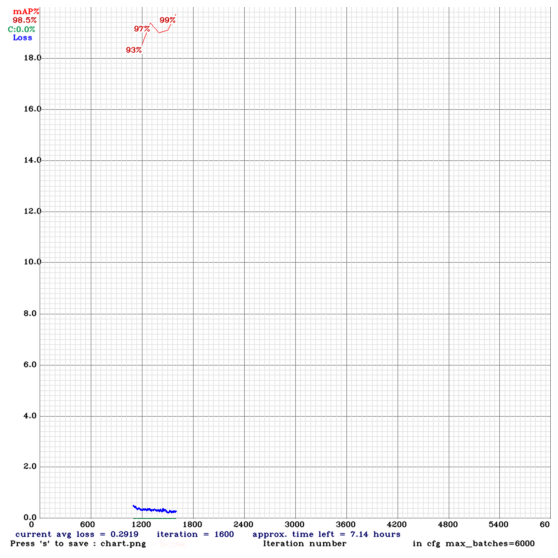

In [ ]:
#only works if the training does not get interrupted
imShow('chart.png')

**Check mAP (mean average precision)**

In [ ]:
##You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 snd so on )

!./darknet detector map data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    224 x 224 x   3 ->  224 x 224 x  32 0.087 BF
   1 conv     64       3 x 3/ 2    224 x 224 x  32 ->  112 x 112 x  64 0.462 BF
   2 conv     64       1 x 1/ 1    112 x 112 x  64 ->  112 x 112 x  64 0.103 BF
   3 route  1 		                           ->  112 x 112 x  64 
   4 conv     64       1 x 1/ 1    112 x 112 x  64 ->  112 x 112 x  64 0.103 BF
   5 conv     32       1 x 1/ 1    112 x 112 x  64 ->  112 x 112 x  32 0.051 BF
   6 conv     64       3 x 3/ 1    112 x 112 x  32 ->  112 x 112 x  64 0.462 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 112 x 112 x  64 0.001 BF
   8 conv 

## **09) Test your custom Object Detector**

### **Make changes to my custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

In [ ]:
#set my custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/gdrive/My Drive/yolov4/darknet/cfg
/content/gdrive/My Drive/yolov4/darknet


### **Run detector on an image**

In [ ]:
# run my custom detector with this command (upload an image to my google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/yolov4/data/obj/1T_00047.jpg -thresh 0.6 
imShow('predictions.jpg')

### **Run detector on a video**

In [6]:
# run my custom detector on a video with this command (upload a video to my google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in my output path

!./darknet detector demo data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights -dont_show /mydrive/mask_test_videos/video_ferrovia.mp4 -i 0 -thresh 0.75 -out_filename /mydrive/mask_test_videos/video_ferrovia_YOLO.avi 

A saída de streaming foi truncada nas últimas 5000 linhas.
 cvWriteFrame 
Objects:

placa_ferroviaria: 88% 

FPS:7.9 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:

placa_ferroviaria: 85% 

FPS:7.9 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:

placa_ferroviaria: 78% 

FPS:7.9 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.7 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.7 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.7 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.9

 cvWriteFrame 
Objects:


FPS:7.7 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.7 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.8 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.9 	 AVG_FPS:7.8

 cvWriteFrame 
Objects:


FPS:7.9 	 

### **Run detector on a webcam image**

In [ ]:
# run detector on images captured by webcam for my custom YOLOv4 trained model
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights photo.jpg -thresh 0.5
imShow('predictions.jpg')   

### **Run detector on a live webcam**

In [ ]:
# Code from theAIGuysCode Github (https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb)
# Adjusted for my custom YOLOv4 trained weights, config and obj.data files

# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline


# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-custom.cfg", "data/obj.data", "/mydrive/yolov4/training/yolov4-custom_best.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # call our darknet helper on video frame
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # loop through detections and draw them on transparent overlay image
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes   

#### **Referências**

*   https://github.com/AlexeyAB/darknet
*   https://arxiv.org/abs/2004.10934
*   https://medium.com/analytics-vidhya/train-a-custom-yolov4-object-detector-using-google-colab-61a659d4868#4894
*   https://blog.roboflow.com/a-thorough-breakdown-of-yolov4/
*   https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial/blob/master/yolov4_webcam.ipynb
*   https://ichi.pro/pt/yolov4-221620826967649
